# <b>Project using Machine learning Model - Random Forest</b></n>
<b><font color = red> 
<i><b>Name        : Snehaa Sivakumar</b><br>
<font color = blue> 
<i><b>I took the dataset from kaggle.com
There are two datasets that are used in this project<br>One is train data and the other is test data<br>
This dataset is all about predicting hospitals which are fraud and not fraud.<br>
Importing all the essential libraries that are needed for this project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<font color = blue> 
<i><b>Loading the csv files to pandas dataframe.<br>Loading both train dataset as well as test dataset into pandas

In [2]:
data_train = pd.read_csv("01_Train_Final.csv")
data_test  = pd.read_csv("01_Test_Final.csv")

<font color = blue> 
<i><b>Check the shape of the training dataset to find the number of rows and columns

In [3]:
data_train.shape

(5410, 53)

<font color = blue> 
<i><b>Check the shape of the testing dataset

In [4]:
data_test.shape

(1353, 52)

<font color = blue> 
<i><b>Check if any null value is present as the first step for datapreprocessing

In [5]:
data_train.isnull().values.any()

True

<font color = blue> 
<i><b>Now since the previous command gave us true, we are now going to find which column has null values

In [6]:
data_train.isnull().sum()

Provider                                     0
deceased_sum                                 0
age_mode                                     0
age_median                                   0
Gender_mode                                  0
Race_mode                                    0
State_mode                                   0
County_mode                                  0
No_days_admitted_median                   3318
No_days_ClaimProcessing_median               0
No_days_ClaimProcessing_mode                 0
AttendingPhysician_mode                      0
RenalDiseaseIndicator                        0
ChronicCond_Alzheimer_median                 0
ChronicCond_Alzheimer_mode                   0
ChronicCond_Cancer_median                    0
ChronicCond_Cancer_mode                      0
ChronicCond_Depression_median                0
ChronicCond_Depression_mode                  0
ChronicCond_Diabetes_median                  0
ChronicCond_Diabetes_mode                    0
ChronicCond_H

<font color = blue> 
<i><b>Since we know which column has missing data, we are going to fill the column with mean value of that attribute.<br>
Filling with mean values is just one of the method for data cleaning.

In [7]:
data_train['No_days_admitted_median'] = data_train['No_days_admitted_median'].fillna(data_train['No_days_admitted_median'].mean())
data_train['DeductibleAmtPaid_median'] = data_train['DeductibleAmtPaid_median'].fillna(data_train['DeductibleAmtPaid_median'].mean())

<font color = blue> 
<i><b>Rechecking if there are any other null values

In [8]:
data_train.isnull().sum()

Provider                                  0
deceased_sum                              0
age_mode                                  0
age_median                                0
Gender_mode                               0
Race_mode                                 0
State_mode                                0
County_mode                               0
No_days_admitted_median                   0
No_days_ClaimProcessing_median            0
No_days_ClaimProcessing_mode              0
AttendingPhysician_mode                   0
RenalDiseaseIndicator                     0
ChronicCond_Alzheimer_median              0
ChronicCond_Alzheimer_mode                0
ChronicCond_Cancer_median                 0
ChronicCond_Cancer_mode                   0
ChronicCond_Depression_median             0
ChronicCond_Depression_mode               0
ChronicCond_Diabetes_median               0
ChronicCond_Diabetes_mode                 0
ChronicCond_Heartfailure_median           0
ChronicCond_Heartfailure_mode   

<font color = blue> 
<i><b>Changing the "PotentialFraud" column from Yes/No to a number as 1/0 

In [9]:
PotentialFraud_map = {'Yes' : 1, 'No' : 0}
data_train['PotentialFraud'] = data_train['PotentialFraud'].map(PotentialFraud_map)
data_train.head(5)

,Provider,deceased_sum,age_mode,age_median,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,No_days_ClaimProcessing_median,...,OPAnnualDeductibleAmt_median,OPAnnualReimbursementAmt_sum,OPAnnualReimbursementAmt_median,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,PotentialFraud
0,PRV55912,105,67,75.0,0,1,39,510,5.0,3.0,...,300,249270,900,148908,1068,1420920,8600,64110,1068.0,1
1,PRV55907,242,81,75.0,0,1,39,770,4.0,0.0,...,420,608230,1210,204920,1068,1946470,3000,64490,0.0,0
2,PRV56046,20,69,70.0,0,1,39,230,4.5,3.0,...,185,24050,700,33632,1068,366840,7520,14952,1068.0,0
3,PRV52405,88,71,71.0,0,1,1,340,3.5,0.0,...,330,251730,970,65148,0,656110,0,23606,0.0,0
4,PRV56614,26,72,72.0,0,1,45,780,3.0,2.0,...,400,103960,970,33108,1068,311840,5500,13884,1068.0,0


<font color = blue> 
<i><b>Now that the data is preprocessed, we need to select esential attributes inorder to train the data<br>
Here we are using correlation method to find the important features

In [10]:
corr = data_train.corr()
corr

,deceased_sum,age_mode,age_median,County_mode,No_days_admitted_median,No_days_ClaimProcessing_median,ChronicCond_Alzheimer_median,ChronicCond_Cancer_median,ChronicCond_Depression_median,ChronicCond_Diabetes_median,...,OPAnnualDeductibleAmt_median,OPAnnualReimbursementAmt_sum,OPAnnualReimbursementAmt_median,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,PotentialFraud
deceased_sum,1.000000,0.061350,0.006115,0.003694,-0.032719,-0.089820,0.151049,0.058815,0.149935,-0.102188,...,-0.041143,0.992131,-0.037308,0.963006,-0.117326,0.960356,-0.104661,0.319219,-0.093856,0.374160
age_mode,0.061350,1.000000,0.483117,-0.000009,0.009401,-0.043690,0.066752,0.005471,0.060555,-0.106456,...,0.008762,0.060367,0.007571,0.068986,-0.038935,0.069311,-0.035021,0.053909,-0.052530,0.048540
age_median,0.006115,0.483117,1.000000,-0.011823,0.027443,0.027064,-0.023979,-0.011269,-0.004815,-0.064936,...,0.020646,0.004405,0.012173,0.011617,0.047864,0.010854,0.016127,0.017214,0.033332,0.008316
County_mode,0.003694,-0.000009,-0.011823,1.000000,0.014075,0.025211,-0.034077,-0.009399,-0.045840,0.008157,...,-0.006253,0.009166,-0.002782,0.000588,0.025251,0.000547,0.020659,-0.020131,0.026932,-0.012711
No_days_admitted_median,-0.032719,0.009401,0.027443,0.014075,1.000000,0.326133,-0.030338,-0.032496,-0.035312,0.023875,...,0.030459,-0.030054,0.020011,-0.047533,0.080223,-0.046398,0.146037,-0.086189,0.041416,-0.078277
No_days_ClaimProcessing_median,-0.089820,-0.043690,0.027064,0.025211,0.326133,1.000000,-0.207687,-0.099650,-0.137152,0.043068,...,0.090373,-0.089852,0.105942,-0.054465,0.525740,-0.054786,0.567631,0.096167,0.669410,0.053504
ChronicCond_Alzheimer_median,0.151049,0.066752,-0.023979,-0.034077,-0.030338,-0.207687,1.000000,0.099729,0.183007,-0.020340,...,-0.090960,0.147340,-0.109708,0.139129,-0.259614,0.141640,-0.217409,0.044721,-0.237076,0.052318
ChronicCond_Cancer_median,0.058815,0.005471,-0.011269,-0.009399,-0.032496,-0.099650,0.099729,1.000000,0.047435,-0.051955,...,-0.130078,0.057443,-0.112646,0.061899,-0.133930,0.062982,-0.146391,0.046696,-0.084245,0.051862
ChronicCond_Depression_median,0.149935,0.060555,-0.004815,-0.045840,-0.035312,-0.137152,0.183007,0.047435,1.000000,-0.016437,...,-0.074364,0.145415,-0.075539,0.133486,-0.167122,0.136575,-0.146141,0.035467,-0.157952,0.044450
ChronicCond_Diabetes_median,-0.102188,-0.106456,-0.064936,0.008157,0.023875,0.043068,-0.020340,-0.051955,-0.016437,1.000000,...,-0.007443,-0.102373,-0.021930,-0.113648,-0.004305,-0.115426,0.009822,-0.090709,-0.007810,-0.084405


<font color = blue> 
<i><b>Inroder to get a better picture about the correlation,we are following the below steps

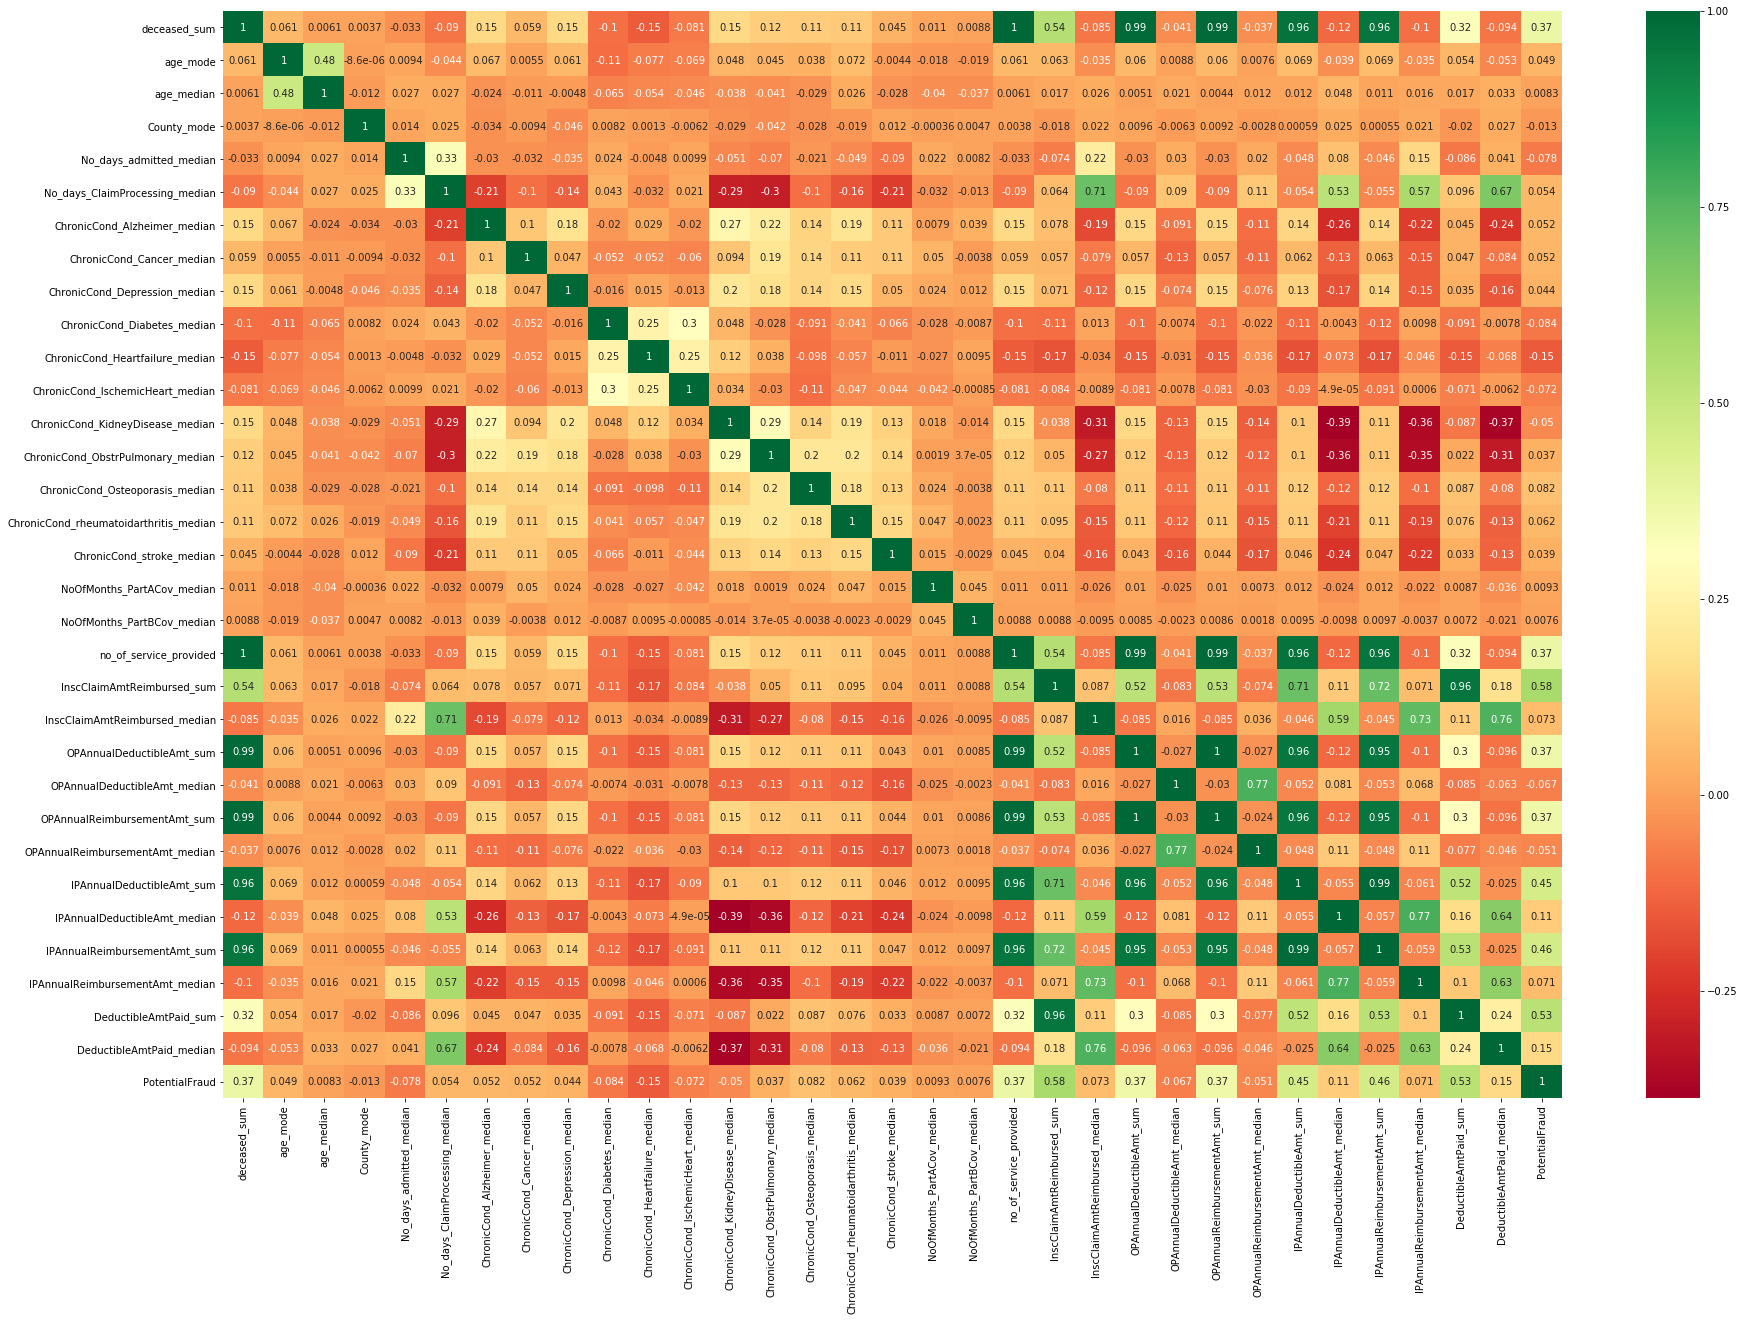

In [11]:
corr = data_train.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<font color = blue> 
<i><b>Train Test Split is used to split the dataset into train and test for using a portion of the dataset for training the model and a portion of the same dataset to test the model for checking the accuracy

In [12]:
from sklearn.model_selection import train_test_split
feature_columns = ['DeductibleAmtPaid_sum','IPAnnualReimbursementAmt_sum','IPAnnualDeductibleAmt_sum',
                  'OPAnnualReimbursementAmt_sum','OPAnnualDeductibleAmt_sum','InscClaimAmtReimbursed_sum',
                  'no_of_service_provided','deceased_sum']
predicted_class = ['PotentialFraud']

In [13]:
X = data_train[feature_columns].values
y = data_train[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

<font color = blue> 
<i><b>Applying RandomForest Algorithm and fiting the dataset in the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

<font color = blue> 
<i><b>We are trying to predict the test dataset by using the random_forest_model

In [15]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.930


<font color = blue> 
<i><b>Check if any null value is present as the first step for datapreprocessing

In [16]:
data_test.isnull().values.any()

True

<font color = blue> 
<i><b>Now since the previous command gave us true, we are now going to find which column has null values

In [17]:
data_test.isnull().sum()

Provider                                    0
deceased_sum                                0
age_mode                                    0
age_median                                  0
Gender_mode                                 0
Race_mode                                   0
State_mode                                  0
County_mode                                 0
No_days_admitted_median                   833
No_days_ClaimProcessing_median              0
No_days_ClaimProcessing_mode                0
AttendingPhysician_mode                     0
RenalDiseaseIndicator                       0
ChronicCond_Alzheimer_median                0
ChronicCond_Alzheimer_mode                  0
ChronicCond_Cancer_median                   0
ChronicCond_Cancer_mode                     0
ChronicCond_Depression_median               0
ChronicCond_Depression_mode                 0
ChronicCond_Diabetes_median                 0
ChronicCond_Diabetes_mode                   0
ChronicCond_Heartfailure_median   

<font color = blue> 
<i><b>Since we know which column has missing data, we are going to fill the column with mean value of that attribute.<br>
Filling with mean values is just one of the method for data cleaning.

In [18]:
data_test['No_days_admitted_median'] = data_test['No_days_admitted_median'].fillna(data_test['No_days_admitted_median'].mean())

<font color = blue> 
<i><b>Rechecking if there are any other null values

In [19]:
data_test.isnull().sum()

Provider                                  0
deceased_sum                              0
age_mode                                  0
age_median                                0
Gender_mode                               0
Race_mode                                 0
State_mode                                0
County_mode                               0
No_days_admitted_median                   0
No_days_ClaimProcessing_median            0
No_days_ClaimProcessing_mode              0
AttendingPhysician_mode                   0
RenalDiseaseIndicator                     0
ChronicCond_Alzheimer_median              0
ChronicCond_Alzheimer_mode                0
ChronicCond_Cancer_median                 0
ChronicCond_Cancer_mode                   0
ChronicCond_Depression_median             0
ChronicCond_Depression_mode               0
ChronicCond_Diabetes_median               0
ChronicCond_Diabetes_mode                 0
ChronicCond_Heartfailure_median           0
ChronicCond_Heartfailure_mode   

<font color = blue> 
<i><b>Now here we are testing the model with our orijinal test dataset

In [20]:
data_predict_test = data_test[feature_columns].values
data_test['PotentialFraud'] = random_forest_model.predict(data_predict_test)

In [21]:
data_test.head(10)

,Provider,deceased_sum,age_mode,age_median,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,No_days_ClaimProcessing_median,...,OPAnnualDeductibleAmt_median,OPAnnualReimbursementAmt_sum,OPAnnualReimbursementAmt_median,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,PotentialFraud
0,PRV57070,12,65,71.0,0,1,45,910,5.0,5.0,...,140,19170,695,24564,2136,310620,20290,12816,1068,0
1,PRV54750,38,71,71.0,0,1,31,620,5.0,0.0,...,335,66100,1090,19824,0,153690,0,9812,0,0
2,PRV53758,182,72,74.0,0,1,22,20,4.0,3.0,...,230,310350,720,238318,1068,2266640,6070,118588,1068,1
3,PRV55825,121,76,73.0,0,1,38,250,3.0,2.0,...,260,231290,660,153224,1068,1385590,7000,84512,1068,1
4,PRV52338,1545,66,72.0,0,1,11,530,4.0,0.0,...,300,2681430,1090,985104,0,8640800,0,162722,0,1
5,PRV55544,37,73,73.0,0,1,36,200,3.0,0.0,...,360,80400,1190,30972,1068,257130,4000,13076,0,0
6,PRV53275,347,70,72.0,0,1,18,550,4.0,0.0,...,285,822050,900,359904,1068,3324140,3605,142864,0,1
7,PRV54989,66,83,76.0,0,1,33,400,4.0,3.0,...,215,137630,905,143304,1068,847690,7045,44906,1068,0
8,PRV57214,612,72,72.0,0,1,49,820,4.0,0.0,...,375,1644730,1290,341276,0,4064080,0,70652,0,1
9,PRV52117,44,76,75.0,0,1,10,580,4.0,2.0,...,200,132950,770,52332,1068,507140,8000,33268,1068,0


<font color = blue> 
<i><b>Changing the "PotentialFraud" column from 0/1 to a number as No/Yes 

In [22]:
PotentialFraud_map = {1 : 'Yes', 0 : 'No'}
data_test['PotentialFraud'] = data_test['PotentialFraud'].map(PotentialFraud_map)
data_test.head(10)

,Provider,deceased_sum,age_mode,age_median,Gender_mode,Race_mode,State_mode,County_mode,No_days_admitted_median,No_days_ClaimProcessing_median,...,OPAnnualDeductibleAmt_median,OPAnnualReimbursementAmt_sum,OPAnnualReimbursementAmt_median,IPAnnualDeductibleAmt_sum,IPAnnualDeductibleAmt_median,IPAnnualReimbursementAmt_sum,IPAnnualReimbursementAmt_median,DeductibleAmtPaid_sum,DeductibleAmtPaid_median,PotentialFraud
0,PRV57070,12,65,71.0,0,1,45,910,5.0,5.0,...,140,19170,695,24564,2136,310620,20290,12816,1068,No
1,PRV54750,38,71,71.0,0,1,31,620,5.0,0.0,...,335,66100,1090,19824,0,153690,0,9812,0,No
2,PRV53758,182,72,74.0,0,1,22,20,4.0,3.0,...,230,310350,720,238318,1068,2266640,6070,118588,1068,Yes
3,PRV55825,121,76,73.0,0,1,38,250,3.0,2.0,...,260,231290,660,153224,1068,1385590,7000,84512,1068,Yes
4,PRV52338,1545,66,72.0,0,1,11,530,4.0,0.0,...,300,2681430,1090,985104,0,8640800,0,162722,0,Yes
5,PRV55544,37,73,73.0,0,1,36,200,3.0,0.0,...,360,80400,1190,30972,1068,257130,4000,13076,0,No
6,PRV53275,347,70,72.0,0,1,18,550,4.0,0.0,...,285,822050,900,359904,1068,3324140,3605,142864,0,Yes
7,PRV54989,66,83,76.0,0,1,33,400,4.0,3.0,...,215,137630,905,143304,1068,847690,7045,44906,1068,No
8,PRV57214,612,72,72.0,0,1,49,820,4.0,0.0,...,375,1644730,1290,341276,0,4064080,0,70652,0,Yes
9,PRV52117,44,76,75.0,0,1,10,580,4.0,2.0,...,200,132950,770,52332,1068,507140,8000,33268,1068,No


<font color = blue> 
    <i><b>Now we have successfully predicted the dataset using one of the machine Learning model - random forest.<br>Also we checked the accuracy of the model that we created, and we found that the model has given us more than 90% accuracy which is good enough to use for the testing dataset. Now henceforth, the model which I had created can easily figure out the difference between a fraud hospital and a non-fraud hospital.